In [1]:
import os, sys
import polyscope as ps
from ddgclib._plotting import *
from ddgclib._curvatures import *
import numpy as np
from ddgclib._catenoid_clean import *
module_path = os.path.abspath(os.path.join('..'))
import matplotlib.pyplot as plt
if module_path not in sys.path:
    sys.path.append(module_path)
    
def cut_y_plane(HC):
    """
    Cuts a y-plane out of the complex to visualise.
    
    :param HC: Complex object 
    :return: Sorted list of vertices in the cut out plane.
    """
    d = 2*c
    vlist = []
    vlist_x = []
    
    for v in HC.V:
        if (abs(v.x[0]) <= 1e-8) and (0.0 <= v.x[1] <= d):
            vlist.append(v)
    
    
    for v in vlist:
        #print(v.x)
        vlist_x.append(v.x)
        #print(type(v.x))
    
    sorted_list = sorted(vlist_x, key=lambda x: x[-1])
    # Ausgabe der sortierten Liste
    #print("Sorted list according to the last element in each tuple:")
    #for tupel in sorted_list:
    #    print(tupel)
    return sorted_list




## Define the known analytical values of the Catenoid bridge

The parameterised Catenoid function is defined as 

$$
\begin{aligned}
& x=c \cosh \left(\frac{v}{c}\right) \cos u \\
& y=c \cosh \left(\frac{v}{c}\right) \sin u \\
& z=v,
\end{aligned}
$$
where $u \in[0,2 \pi)$. And $c$ is an arbitary parameter.

The principal curvatures are
$$
\begin{aligned}
\kappa_1 & =\frac{1}{c} \operatorname{sech}^2\left(\frac{v}{c}\right) \\
\kappa_2 & =-\frac{1}{c} \operatorname{sech}^2\left(\frac{v}{c}\right) .
\end{aligned}
$$

The mean curvature of the catenoid is
$$
H= \kappa_1 + \kappa_2 = 0
$$



and the Gaussian curvature is
$$
K=-\frac{1}{c^2} \operatorname{sech}^4\left(\frac{v}{c}\right) .
$$

In [2]:
# Define kappa_1 in terms of v and c
def fun_kappa1(c, v):
    kappa_1 = (1/c) *(sech(v/c))**2
    return kappa_1

def fun_kappa2(c, v):
    kappa_2 = -1/c *sech(v/c)**2
    return kappa_2

def gaussian_curvature_catenoid(c, v):
    '''
    Analytical Solution for gaussian curvature
    '''
    return -1/c**2 * sech(v/c)**4

def gaussian_curvature(kappa1, kappa2):
    K = kappa1 * kappa2
    return K

def mean_curvature(f0, f1, f2):
    pass

def unit_vector(f1,f2):
    e_ij = np.abs(f2-f1)
    return e_ij


#### Find integrated values

In [3]:
from sympy import symbols, integrate#, sech
import sympy as sp

# Define symbols and parameters
v, c = symbols('v c')

# Define kappa_1 in terms of v and c
kappa_1 = 1 / c * sp.sech(v / c)**2
#kappa_1 = 1 / c * 1/sp.cosh(v / c)**2

# Define the integration bounds for v
v_min = 0.1  # replace with the lower bound of the domain
v_max = 0.2  # replace with the upper bound of the domain

# Integrate kappa_1 with respect to v over the given domain
integrated_kappa_1 = integrate(kappa_1, (v, v_min, v_max)).evalf()

# Display the result
print("Integrated kappa_1 over the domain:", integrated_kappa_1)

Integrated kappa_1 over the domain: Integral(sech(v/c)**2, (v, 0.1, 0.2))/c


#### Numerical intergration

In [4]:
from scipy.integrate import quad
import numpy as np

# Define the integrand function
def kappa_1_integrand(v, c):
    return (1 / c) * np.power(sech(v / c), 2)

# Define the integration bounds for v
v_min = -1.0  # replace with the lower bound of the domain
v_max = 0.0   # replace with the upper bound of the domain

# Define the parameter c
c_value = 1.0  # replace with the actual value of c

# Numerically integrate the function over the specified domain
result, error = quad(kappa_1_integrand, v_min, v_max, args=(c_value))

# Display the numerical result
print("Numerical result of the integrated kappa_1 over the domain:", result)

Numerical result of the integrated kappa_1 over the domain: 0.7615941559557649


#### Generate the Catenoid function as a complex and extract the profile of the bridge

$\kappa_1$ (-1.0) = 0.41997434161402614
$\kappa_1$ (-0.5) = 0.7864477329659276
$\kappa_1$ (0.0) = 1.0
$\kappa_1$ (0.5) = 0.7864477329659276
$\kappa_1$ (1.0) = 0.41997434161402614


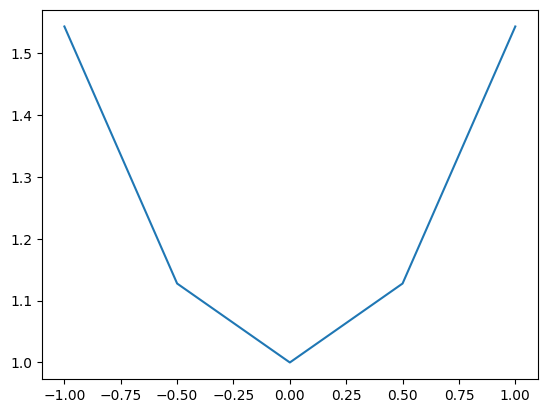

In [5]:
# Global parameters
c = 1
length = 2
HC, bV, K_f, H_f, neck_verts, neck_sols = catenoid_clean_N(c, length, refinement=2)
#plot_polyscope(HC)

yplane = cut_y_plane(HC)
xvals = []
yvals = []
for v in yplane:    
    yvals.append(v[1])
    xvals.append(v[2])

plt.plot(xvals, yvals)

# Print key properties
for v in yplane:
    print(f'$\kappa_1$ ({v[2]}) = {fun_kappa1(c, v[2])}')

In [6]:
import numpy as np

def calculate_curvature_between_points(p1, p2, p3):
    # Vektoren zwischen den Punkten
    vector1 = np.array(p2) - np.array(p1)
    vector2 = np.array(p3) - np.array(p2)
    
    # Längen der Vektoren
    length1 = np.linalg.norm(vector1)
    length2 = np.linalg.norm(vector2)
    
    # Normalisierte Vektoren
    unit_vector1 = vector1 / length1
    unit_vector2 = vector2 / length2
    
    # Krümmung der interpolierten Kurve
    curvature = np.linalg.norm(unit_vector2 - unit_vector1) / (length1 + length2)
    
    return curvature

# Beispiel-Punkte
point1 = [1.0, 2.0, 3.0]
point2 = [4.0, 5.0, 6.0]
point3 = [7.0, 8.0, 9.0]

# Krümmung berechnen
curvature = calculate_curvature_between_points(point1, point2, point3)

print(f'Krümmung zwischen den Punkten: {curvature}')

Krümmung zwischen den Punkten: 0.0


In [7]:
calculate_curvature_between_points(yplane[1], yplane[2], yplane[3])

0.4792772476737562

In [8]:

def calculate_curvature_between_points_2(p1, p2, p3):
    # Vektoren zwischen den Punkten
    vector1 = np.array(p2) - np.array(p1)
    vector2 = np.array(p3) - np.array(p1)
    
    # Längen der Vektoren
    length1 = np.linalg.norm(vector1)
    length2 = np.linalg.norm(vector2)
    
    # Normalisierte Vektoren
    unit_vector1 = vector1 / length1
    unit_vector2 = vector2 / length2
    
    # Krümmung der interpolierten Kurve
    curvature = np.linalg.norm(unit_vector2 - unit_vector1) / (length1 + length2)
    
    return curvature


calculate_curvature_between_points(yplane[2], yplane[1], yplane[3])

1.3089477497574968

In [195]:
v1 = yplane[1]
v2 = yplane[2]
v3 = yplane[3]
v1 = HC.V[v1]
v2 = HC.V[v2]
v3 = HC.V[v3]
v1.x, v2.x, v3.x

((6.9047176446271943585e-17, 1.1276259652063807853, -0.5),
 (6.123233995736765886e-17, 1.0, 0.0),
 (6.9047176446271943585e-17, 1.1276259652063807853, 0.5))

In [207]:
(1.1276259652063807853 - 1.0)/0.5

0.2552519304127614

In [203]:
result1, error = quad(kappa_1_integrand, -0.5, 0.5, args=(c))
result2, error = quad(kappa_1_integrand, -0.25, 0.25, args=(c))
result1, result2

(0.9242343145200195, 0.4898373248074182)

In [165]:
(1 / c) * np.power(sech(-1.0 / c), 2), (1 / c) * np.power(np.cosh(-1.0 / c), -2)

(0.41997434161402614, 0.4199743416140261)

In [166]:
v0 = yplane[0]
v1 = yplane[1]
v2 = yplane[2]
v3 = yplane[3]
v0[1], v1[1], v2[1]

(1.5430806348152437785, 1.1276259652063807853, 1.0)

In [167]:
v0

(9.44864380126377042e-17, 1.5430806348152437785, -1.0)

In [168]:
 1/np.linalg.norm(v0[2]- v1[2]) * (v1[1] - v0[1])/(0.5*np.linalg.norm(v0[2] - v1[2]))

-3.3236373568709039463

In [169]:
 1/np.linalg.norm(v0[2]- v1[2]) * (v1[1] - v0[1])/2 #*  1/np.linalg.norm(v0[2]- v1[2]) 

-0.4154546696088629933

In [170]:
kappa = fun_kappa1(c, v0[2])
kappa

0.41997434161402606934

In [171]:
kappa_num = 1/np.linalg.norm(v2[2]- v1[2]) * (v1[1] - v2[1]) + 1/np.linalg.norm(v3[2]- v2[2]) * (v3[1] - v2[1]) #*  1/np.linalg.norm(v0[2]- v1[2]) 
kappa_num, kappa_num *(v2[1]) *2, kappa_num/(0.5*np.linalg.norm(v2[2]- v1[2]) + 0.5*np.linalg.norm(v3[2]- v2[2]))

(0.510503860825523141, 1.021007721651046282, 1.021007721651046282)

In [172]:
kappa = fun_kappa1(c, v2[2])
kappa

1.0

In [173]:
# From the surface mean normal curvature
v2 = HC.V[yplane[2]]

In [174]:
v2.x

(6.123233995736765886e-17, 1.0, 0.0)

In [175]:
FF, nn = vectorise_vnn(v2)
cdict = b_curvatures_hn_ij_c_ij(FF, nn)
HNdA_i = cdict['HNdA_i']
HNdA_i

array([2.05998413e-17, 3.39519314e-01, 0.00000000e+00], dtype=float128)

In [181]:
# Compare with numerical integration of exact result
result1, error = quad(kappa_1_integrand, -0.5, 0.5, args=(c))
result2, error = quad(kappa_1_integrand, -0.25, 0.25, args=(c))
result, result2

(0.7615941559557649, 0.4898373248074182)

In [177]:
for vj in v2.nn:
    print(vj.x)

(6.9047176446271943585e-17, 1.1276259652063807853, -0.5)
(6.9047176446271943585e-17, 1.1276259652063807853, 0.5)
(1.0, 0.0, 0.0)
(-0.7293191971294839696, 0.72931919712948410357, 0.25)
(-0.7293191971294839696, 0.72931919712948410357, -0.25)
(0.72931919712948405896, 0.7293191971294840143, 0.25)
(0.72931919712948405896, 0.7293191971294840143, -0.25)
(-1.0, 1.2246467991473531772e-16, 0.0)


## Boundary vertex:

In [211]:
v0 = HC.V[yplane[0]]  # kappa_1 = 0.419974341614026069
FF, nn = vectorise_vnn(v0)
cdict = b_curvatures_hn_ij_c_ij(FF, nn)
HNdA_i = cdict['HNdA_i']
HNdA_i

array([-2.30935063e-17, -3.75722151e-01,  1.58071335e+00], dtype=float128)

In [212]:
for vj in v0.nn:
    print(vj.x)

(0.91547933008387026213, 0.915479330083870206, -0.75)
(6.9047176446271943585e-17, 1.1276259652063807853, -0.5)
(-1.5430806348152437785, 1.889728760252754084e-16, -1.0)
(1.5430806348152437785, 0.0, -1.0)
(-0.91547933008387015, 0.91547933008387031813, -0.75)


In [213]:
result1, error = quad(kappa_1_integrand, -1.0, -0.5, args=(c))
result2, error = quad(kappa_1_integrand, -1.0, -0.75, args=(c))
result, result2

(0.2994769986957551, 0.12644520356847755)

In [162]:
result*2

1.5231883119115297

In [163]:
result1, error = quad(kappa_1_integrand, -1.0, -0.5, args=(c), epsabs=1e-20)
result2, error = quad(kappa_1_integrand, -1.0, -0.75, args=(c), epsabs=1e-20)
result, result2

(0.7615941559557649, 0.12644520356847755)

In [216]:
calculate_curvature_between_points(yplane[0], yplane[1], yplane[2])

0.37712333301267442128

# Old code

In [ ]:
# 

def boundary_vertices(HC):
    number_v = 0
    for v in HC.V:
        number_v += 1
        #print(number_v)
    
    boundary_bottom = []
    boundary_top    = []
    
    v_l = - length/2
    v_u =   length/2
    for v in HC.V:
       # print(v.index)
        if v.x[2] == v_l:
            boundary_bottom.append(v)
    
        if v.x[2] == v_u:
            boundary_top.append(v)

        #print(v.cache[1])

#print(HC.V.cache)

'''
v.index=1
v.x = (1.5430806348152437, -3.779457520505508e-16, 1.0)
'''

In [ ]:
boundary_bottom_x = []
for v in boundary_bottom:
    #dummy_item.append(v.index)
    boundary_bottom_x.append(v.x)

boundary_top_x = []
for v in boundary_top:
    #dummy_item.append(v.index)
    boundary_top_x.append(v.x)

print(boundary_top_x[1][1])